# 04 matplotlib

![Salinity](http://pong.tamu.edu/~kthyng/movies/txla_plots/salt/2004-07-30T00.png)
http://kristenthyng.com/gallery/txla_salinity.html

Data and model results can be abstract if we can't see how they look. Also, it is easy to get too removed from  calculations and end up with answers that don't make sense. A straight-forward way to investigate information and to have a reality check is by plotting it up. Here we will cover the basics for making a variety of commonly-used plots.

matplotlib provides a [gallery](http://matplotlib.org/gallery.html) of plot examples, as described by text and shown as plots. This is really helpful for finding what you want to do when you don't know how to describe it, and to get ideas for what possibilities are out there.

To produce figures inline in Jupyter notebooks, you need to run the command `%matplotlib inline`.

In [268]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

A quick plot without any setup:

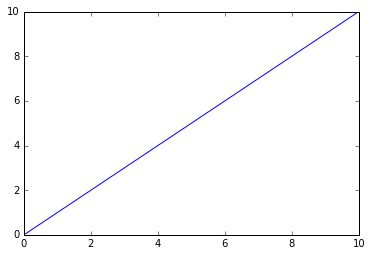

In [269]:
x = np.linspace(0, 10)
plt.plot(x, x)

You can subsequently alter the plot with commands like `plt.xlabel('xlabel')` which act on the active figure, but you can only reference one figure at a time when they are not named.

So, problems with this:

* Less control
* Harder to make changes later
* Alters any figure you may already have open

So, don't screw over future you! Set up your plot properly from the beginning

# A. Figure overview

A figure in matplotlib has several basic pieces, as shown in the following image. Note that `axes` refers to the area within a figure that is used for plotting and `axis` refers to a single x- and y-axis.

![fig](http://matplotlib.org/_images/fig_map.png)
http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure


## Figure and axes setup

Steps for setting up a figure:

1. Open a figure, save the object to a variable, and size it as desired.
2. Add axes to the figure. Axes are the objects in which data is actually plotted.
3. Add labels to clearly explain the plot, such as axis labels and a title.
4. Plot! Most basically, use the `plot` command to plot lines and markers.

Here is a good way to set up a general figure so that you can easily work with it:

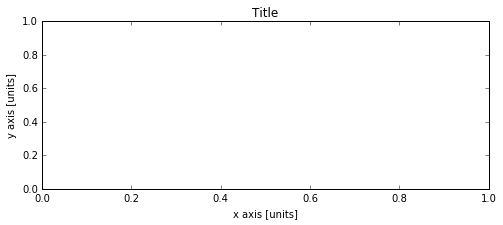

In [270]:
fig = plt.figure(figsize=(8, 3))  # figure size is given as a (width, height) tuple
ax = fig.add_subplot(111)  # 
ax.set_xlabel('x axis [units]')
ax.set_ylabel('y axis [units]')
ax.set_title('Title')

## Useful commands and keyword arguments

These commands and keyword arguments should be frequently used to customize and properly label your figures. Command syntax shown is common usage, not all available options.

### labels and text

`ax.set_xlabel(xlabel, fontsize, color)`, `ax.set_ylabel(ylabel, fontsize, color)`: Label the x and y axis with strings xlabel and ylabel, respectively. This is where you should state what is being plotted, and also give units.

`ax.set_title(Title, fontsize, color)`: Label the top of the axes with a title describing the plot.

[`fig.suptitle(Suptitle, fontsize, color)`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.suptitle): Label the overall figure, above any subplot titles.

[`ax.text(x, y, text, color, transform=ax.transAxes)`](http://matplotlib.org/api/text_api.html#matplotlib.text.Text): Write text in your axes. The text will appear at location (x,y) in data coordinates — often it is easier to input the location in units of the axes itself (from 0 to 1), which is done by setting transform=ax.transAxes. The text is input as a string and `color` controls the color of the text.

### [subplot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot)

`fig.add_subplot(nrows, ncols, plot_number)`

Above, we showed an example of adding a single axes to the figure, with the command `fig.add_subplot(111)`. This command can be used to add multiple axes to the figure instead of a single one. These subplots can divide up the available space in the figure only in a simple way, which is enough for most cases.

An example with 1 row and 2 columns of axes is shown, with the `plot_number` increasing from 1 across the rows then columns, up to the number of axes (2, in this case).

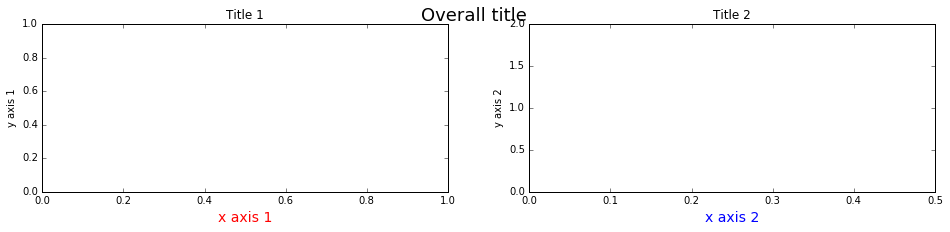

In [271]:
# subplot example
fig = plt.figure(figsize=(16, 3))

ax1 = fig.add_subplot(1, 2, 1)  # 1st subplot
ax1.set_xlabel('x axis 1', fontsize=14, color='r')
ax1.set_ylabel('y axis 1')
ax1.set_title('Title 1')

ax2 = fig.add_subplot(1, 2, 2)  # 2nd subplot
ax2.set_xlabel('x axis 2', fontsize=14, color='b')
ax2.set_ylabel('y axis 2')
ax2.set_title('Title 2')
ax2.set_xlim(0, 0.5)
ax2.set_ylim(0, 2)

fig.suptitle('Overall title', fontsize=18)
#fig.tight_layout()  # helper function to clean up plot

### [subplots](http://matplotlib.org/examples/pylab_examples/subplots_demo.html)

`fig, axes = plt.subplots(nrows, ncols)`

If we want to use many subplots, it is more concise to save the number of axes to an array so that we can loop through them. This function allows us to have subplots with shared x, y, or both axes, which then shares the x and y limits and the ticks and tick labels.

An example with 3 rows and 2 columns of axes is shown. We loop through the axes instead of listing each out
separately. We demonstrate the ability to share the x axis.

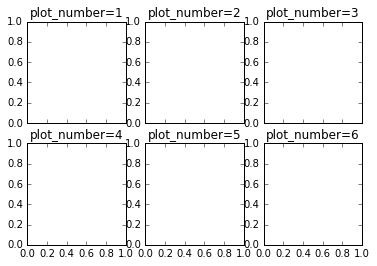

In [272]:
fig, axes = plt.subplots(2, 3, sharex=True)

# loop through axes
for i, ax in enumerate(axes.flat):
    
    ax.set_title('plot_number=' + str(i+1))  # add 1 to plot_number since it starts counting at 1

# make plot look nicer
# fig.tight_layout()  # Use to make plot look nicer

### axes layout

[`fig.tight_layout()`](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure.tight_layout): convenience function to automatically improve spacing between subplots (already used above).

[`fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)`](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure.subplots_adjust): Any of the keywords listed may be used to override the default values. In order, the adjust the left, bottom, right, and top of the subplots, the width and height for space between subplots. These values can be altered graphically when using a GUI version of a plot in iPython.

### axis control

`ax.set_xlim(xmin, xmax)`, `ax.set_ylim(ymin, ymax)`: Set the x and y axis limits to xmin, xmax and ymin, ymax, respectively.

#### [axis](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.axis)

The axis values by default encompass the plotted data comfortably, usually giving some space at the edges, depending on the numbers. However, this can be modified. Common usages:

`axis('equal')`: sets x and y limits so that the increments on both axes are equal lengths.

`axis('tight')`: sets axis limits to just encompass the data, with no extra space on the ends.

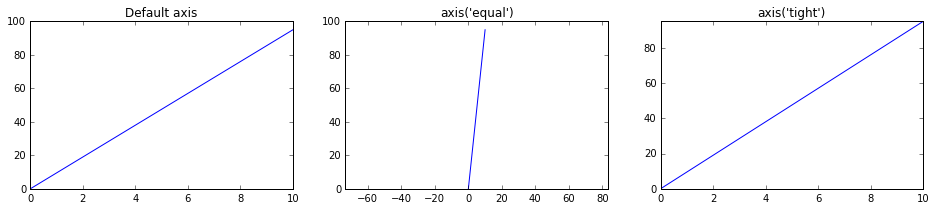

In [273]:
# axis examples
x = np.linspace(0, 10)

fig = plt.figure(figsize=(16, 3))

# No adjustments to axis
ax1 = fig.add_subplot(1, 3, 1)
ax1.plot(x, 9.5*x)
ax1.set_title('Default axis')

# Using axis('equal')
ax2 = fig.add_subplot(1, 3, 2)
ax2.plot(x, 9.5*x)
ax2.axis('equal')
ax2.set_title("axis('equal')")

# Using axis('tight')
ax3 = fig.add_subplot(1, 3, 3)
ax3.plot(x, 9.5*x)
ax3.axis('tight')
ax3.set_title("axis('tight')")

---
###  *Exercise*

> Create figures with multiple axes two ways: with `add_subplot` and with `subplots`. Plot something simple, then label the x and y axis, and try changing the limits of the x and y axis with `xlim`, `ylim` and `axis`, and adjusting the overall character with `tight_layout` and `subplots_adjust`. Change the fontsize and color of your labels.

> Help the other students at your table: if you are finished, you should be looking around to see who could use some help. Be prepared to show off your results! We will be sharing screens in class.

---

**Plot Example**
![sample](http://cbio.ensmp.fr/~nvaroquaux/jhepc/_images/entry10.png)
http://cbio.ensmp.fr/~nvaroquaux/jhepc/2013/entry10/index.html

### Plotting with `datetime` objects

If you want to plot with time, use `datetime` objects to hold the time/dates. Then when you plot, things will work out nicely. In fact, in the following example, the plotted dates will be formatted correctly whether or not you plot with the special function [`plot_date()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot_date). But, to have them be readable, we need to rotate the labels.

In [274]:
# Code from hw02 solution

from datetime import datetime

# Copied some code from class materials
f = open('../../python4geosciences/data/GPS.dat')
f.seek(0)  # This sets the pointer back to the beginning of the file. This allows us to run this
           # block of code many times without reopening the file each time.

trackname = None  # initialize the track name
datetimes = []
for line in f.readlines():        # iterate over each line in the file. Each line is a string.
    data = line.split('\t')       # split the line of text into words, each separated by tabs, to get full drifter name
    if data[0] == 'Track':        # look for track data
        trackname = data[1]       # save trackname since we only want data from ACTIVE LOG
        continue
    if trackname == 'ACTIVE LOG':
        if data[0] == 'Trackpoint':   # We only want to consider lines that begin with 'Trackpoint', as these hold the data
            datetimeinfo = data[2].split()
            date = datetimeinfo[0].split('/')
            month = int(date[0])
            day = int(date[1])
            year = int(date[2])
            time = datetimeinfo[1].split(':')
            hour = int(time[0])
            min = int(time[1])
            sec = int(time[2])
            if datetimeinfo[2] == 'PM':
                hour = hour + 12
            datetimes.append(datetime(year, month, day, hour, min, sec))
            
    else:
        continue

In [275]:
# Code from hw02 solution

## Grad student problem ##

missing_value = -999

# Copied some code from class materials
f = open('../../python4geosciences/data/GPS.dat')
f.seek(0)  # This sets the pointer back to the beginning of the file. This allows us to run this
           # block of code many times without reopening the file each time.

gps = {}  # initialize drifter dictionary
trackname = None  # initialize the track name
latitudes = []     # create empty lists to store numerical values of lat and lon
longitudes = []

for line in f.readlines():        # iterate over each line in the file. Each line is a string.
    data = line.split('\t')       # Use tabs because some lines have no data for entries but they do have tabs
    if not data: continue         # Test for an empty list, the same as if data == []
    if data[0] == 'Track':        # look for track data
        trackname = data[1]      
        gps[trackname] = dict()
        gps[trackname]['lat'] = []  # initialize
        gps[trackname]['lon'] = []
        gps[trackname]['speed'] = []
        continue
    if data[0] == 'Trackpoint':
        # this is different from in class because I split the line by tabs instead of spaces
        llstring = data[1].split(' ')  # lat lon string
        lat = int(llstring[0][1:]) + float(llstring[1])/60.
        gps[trackname]['lat'].append(lat)
        lon = int(llstring[2][1:]) + float(llstring[3])/60.
        gps[trackname]['lon'].append(lon)
        if len(data) > 8:  # this catches the one weird line with fewer tabs, which has no speed
            speed = data[7].split(' ')[0]
            if speed == '':
                gps[trackname]['speed'].append(missing_value)  # there aren't values available for many entries
            else:  # it is a string containing a number
                gps[trackname]['speed'].append(float(speed))
        else:
            gps[trackname]['speed'].append(missing_value)


In [276]:
# Need to mask out missing values
imissing = np.asarray(gps['ACTIVE LOG']['speed'][:]) == -999
gps['ACTIVE LOG']['speed'] = np.ma.masked_where(imissing, gps['ACTIVE LOG']['speed'])

(array([ 732451.56805556,  732451.57847222,  732451.58888889,
         732451.59930556,  732451.60972222,  732451.62013889,
         732451.63055556,  732451.64097222]),
 <a list of 8 Text xticklabel objects>)

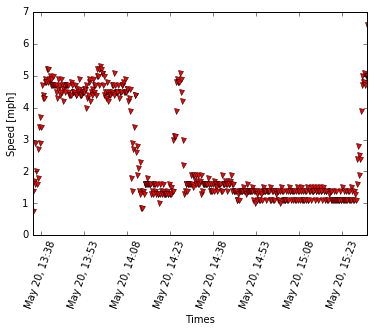

In [277]:
import matplotlib.dates
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(datetimes, gps['ACTIVE LOG']['speed'], 'rv', ms=5)

# labels
ax.set_xlabel('Times')
ax.set_ylabel('Speed [mph]')

# Fix the formatting of the dates since ugly
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d, %H:%M'))
plt.xticks(rotation=70)  # rotationg usually important for dates

### ticks, ticklabels, spines

Spines are the lines making up the x and y axis — both top/bottom and left/right. Ticks are the locations of the little marks (ticklines) along the axis, and ticklabels are the text. You can control each of these independently in a couple of ways, including the following and with `tick_params`.

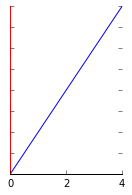

In [278]:
x = np.linspace(0, 4)

fig = plt.figure(figsize=(2, 3))
ax = fig.add_subplot(111)
ax.plot(x, x)

# turn off right and top spines:
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Change color of left spine
ax.spines['left'].set_color('r')

# # But the ticks on the top and right axis are still there!
# # That's because they are controlled separately.

ax.xaxis.set_ticks_position('bottom')  # turns off top tick marks

ax.set_yticklabels('')  # Turn off y tick labels (the text)

xticklocs = [0, 2, 4]
xticklabels = ['1st', '2nd', '3rd']
plt.xticks(xticklocs);

### Removing offset from axis

By default, matplotlib will format the axis with a relative shift if there is a large difference in the axis value range. Sometimes this is helpful and sometimes it is annoying. We can turn this off with `ax.get_xaxis().get_major_formatter().set_useOffset(False)`.

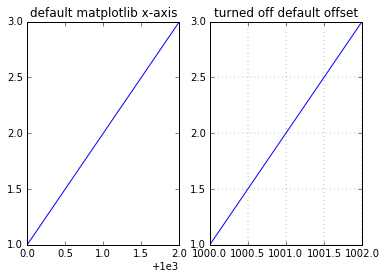

In [279]:
fig = plt.figure()

ax1 = fig.add_subplot(121)
ax1.plot([1000, 1001, 1002], [1, 2, 3])
ax1.set_title('default matplotlib x-axis')

ax2 = fig.add_subplot(122)
ax2.plot([1000, 1001, 1002], [1, 2, 3])
ax2.set_title('turned off default offset')
ax2.get_xaxis().get_major_formatter().set_useOffset(False)
ax2.grid(True, color='k', linestyle=':', linewidth=0.25)

---
###  *Exercise*

> Using the data read in above from `GPS.dat`, plot the longitude of the drifter ACTIVE LOG vs. the datetimes at which the data were taken. How does the longitude axis look? Fix it as needed. Then remove the right and top spines, ticks, and ticklabels so that we are left with just the left and bottom indicators.

---

### Legends

[`ax.legend([possible sequence of strings], loc)`](http://matplotlib.org/api/legend_api.html#matplotlib.legend.Legend)

where loc tells where in the axes to place the legend:
'best'         : 0, (only implemented for axes legends)
'upper right'  : 1,
'upper left'   : 2,
'lower left'   : 3,
'lower right'  : 4,
'right'        : 5,
'center left'  : 6,
'center right' : 7,
'lower center' : 8,
'upper center' : 9,
'center'       : 10,

A legend or key for a plot can be produced by matplotlib by either labeling plots as they are plotted and then calling the legend command, or by plotting and then labeling them in order within the legend command.

Note also that when a marker is used for plotting, the legend by default puts two of them in the legend, which is rather ugly. This can be changed by adding `numpoints=1` into the `legend()` call.

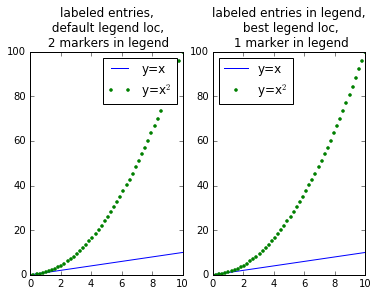

In [280]:
x = np.linspace(0, 10)

fig = plt.figure()

# Using default legend location and labeled plots as they were plotted
ax1 = fig.add_subplot(121)
ax1.plot(x, x, label='y=x')
ax1.plot(x, x**2, '.', label='y=x$^2$')
ax1.legend()
ax1.set_title('labeled entries,\n default legend loc,\n 2 markers in legend')

# Chose "best" location for legend and labeled plots in the legend in order of plotting
ax2 = fig.add_subplot(122)
ax2.plot(x, x)
ax2.plot(x, x**2, '.')
ax2.legend(('y=x', 'y=x$^2$'), loc=0, numpoints=1)
ax2.set_title('labeled entries in legend,\n best legend loc,\n 1 marker in legend')


### Plotting inputs

#### [colors](http://matplotlib.org/api/colors_api.html#module-matplotlib.colors)

A handful of colors are available by a single letter code:
- b: blue
- g: green
- r: red
- c: cyan
- m: magenta
- y: yellow
- k: black
- w: white, 
- and many more are available by (html) name:

![color chart](http://i.stack.imgur.com/k2VzI.png)
http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib

Other inputs to matplotlib possible:

* Gray scale: a string with a float in it between 0 (black) and 1 (white)
* Hex: '#eeefff'
* RGB tuple in the range [0,1]: [0.1, 0.2, 0.3]

#### [line styles and markers](http://matplotlib.org/1.3.1/examples/pylab_examples/line_styles.html)

There are several line styles and many markers available for plotting. You can plot a marker alone, a line alone, or a combination of the two for even more options. Here are some examples:

![line styles and markers](http://matplotlib.org/1.3.1/_images/line_styles.png)
http://matplotlib.org/1.3.1/examples/pylab_examples/line_styles.html

#### options

- `markersize` or `ms`: how large the markers are, if used
- `markeredgecolor` or `mec`: color of marker edge, can be None
- `markerfacecolor` or `mfc`: color of marker face, case be None
- `linewidth` or `lw`: width of line if using a linestyle
- `color`: color of line or marker
- `alpha`: transparency of lines/markers, from 0 (transparent) to 1 (opaque)

#### Plotting usage examples

Many usage examples for `plot` can be found with

    plt.plot?
    
Can use some shortcuts for simple options:

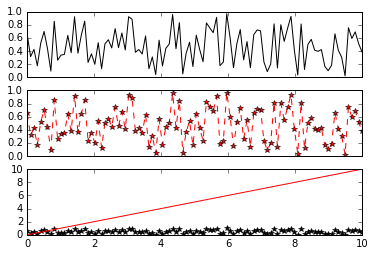

In [285]:
x = np.linspace(0, 10, 100)
y = np.random.rand(100)

fig, axes = plt.subplots(3, 1, sharex=True)
axes[0].plot(x, y, 'k-')  # Plots with a black line
axes[1].plot(x, y, 'r*--')  # Plots with a red dashed line with stars
axes[2].plot(x, y, 'k*', x, x, 'r')  # can plot more than one line with one call without keywords

For more control, need to use keyword arguments. For example, unless you want to use one of the single-letter color names, you need to use the keyword `color` to choose your color.

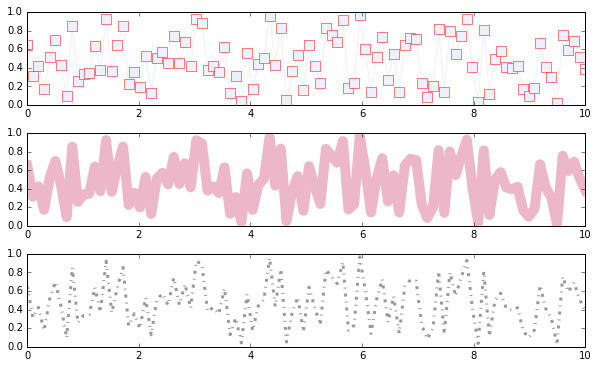

In [289]:
fig, axes = plt.subplots(3, 1, figsize=(10, 6))
# Large light blue squares (defined by hex) with red edges
axes[0].plot(x, y, color='#eeefff', markersize=10, marker='s', markeredgecolor='r')  
axes[1].plot(x, y, color='palevioletred', linewidth=10, alpha=0.5)  # Thick, half-transparent line
axes[2].plot(x, y, '-.', color='0.6', lw=3)  # grayscale line
fig.subplots_adjust(hspace = 0.3)

---
###  *Exercise*

> The following don't work. Why?

    plt.plot(x, y, 'r*b:')
    plt.plot(x, y, 'r*', ms=20, x, y, 'b:')

---

## Example

Let's plot something from the CTD data we used in numpy.

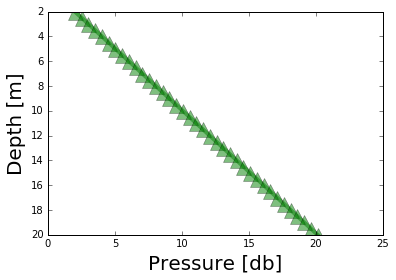

In [291]:
data = np.loadtxt('03_CTD.dat', comments='*')

# set up figure
fig = plt.figure()
ax = fig.add_subplot(111)

# plot data
ax.plot(data[:,0], data[:,1], 'g-^', lw=4, ms=15, alpha=0.5)
ax.invert_yaxis()

# labels
ax.set_xlabel("Pressure [db]", fontsize=20)
ax.set_ylabel("Depth [m]", fontsize=20)

---
###  *Exercise*

> Use the CTD data set from the previous example and compare two sets of temperature data: the temperature and the potential temperature. They are related but different measures, but they have similar values that we'd like to compare. Plot both of them vs. depth, making sure that you distinguish the two lines, label your plot appropriately, and use a legend.

---

![Sample Pic](http://stsdas.stsci.edu/download/mdroe/plotting-2015/_images/entry15.png)
http://stsdas.stsci.edu/download/mdroe/plotting-2015/entry15/index.html

### Get current plot

These can be used if you didn't properly set up your figure in the first place and want to be able to reference the current plot.

[`plt.gca()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.gca): Gets the current Axes instance.

[`plt.gcf()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.gcf): Gets the current Figure instance.

### Labels with math

Sometimes we want to be able to use $\LaTeX$ to write math in axis labels, especially for units. We can do this in matplotlib! We just have to use proper $\LaTeX$ notation for writing the math, and put an 'r' in front of the string, though often the 'r' doesn't appear to be needed.

In [ ]:
fig = plt.figure(figsize=(2, 1))
ax = fig.add_subplot(111)
ax.set_xlabel('Speed [m s$^{-1}$]')
ax.set_ylabel('Volume [m$^{3}$]')

### [savefig](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.savefig)

`fig.savefig(fname, dpi=None, bbox_inches='tight')`

This is how you can save the figure that you have made. Input a file name, fname and the dots per inch if you want something higher than the default. `bbox_inches='tight'` trims the white space around the figure; alternatively a number can be input to pad the figure if it cuts too close, but the 'tight' option works most of the time.

---
### *Exercise*

> Suppose that we want to see how transmission data from this '03_CTD.dat' file varies with depth at the same time we want to see how pressure varies with depth. Plot both of these at the same time on a plot, with one using the y axis on the left and one using the y axis on the right side of the axes. They should each have their own color (try different methods of assigning color!) and label on their respective y axis. 

> What happens if you make your xlabel larger in fontsize? Can you do the same for the ticklabels to match? Can you change the size or other properties of the ticklines?

> Save your figure when you are finished, and open it up on your computer to check it out.

---

### *Good design principles*

We all need to spend a bit of extra time to make really good plots instead of just-ok plots. This is worth the time because of how much clearer the result can be, which improves clarity, understanding, and communication.

Some guidelines to follow:
* Always label all axes, with units if appropriate;
* Make all text large enough to be easily seen by whatever type of viewer will be seeing your image — fontsize needs to be larger for a presentation than for a paper — this includes the ticklabels!;
* Make all lines thick enough to be easily seen;
* Make all lines/markers distinct in both color and line/marker style so that the legend is correct even in grayscale;
* Use colors that are complementary! The default choices aren't usually so pretty (though `matplotlib` is having a style defaults update soon);
* Don't forget to pay attention to edge lines on markers and bars, the font style, and other details;
* You can update your own defaults with the [matplotlibrc file](http://matplotlib.org/users/customizing.html) or you can use other people's, like from the [seaborn](http://stanford.edu/~mwaskom/software/seaborn/) (statistical data visualization) package:

![Seaborn Example](http://stanford.edu/~mwaskom/software/seaborn/_images/hexbin_marginals.png)
http://stanford.edu/~mwaskom/software/seaborn/examples/hexbin_marginals.html

---
### *Exercise*

> Go back to the plots you've worked on and look at them again — what can you improve to make the plot more clear? Take some time to do this right now.

---

# C. Histogram

A histogram shows how many instances of data are in a particular bin in your data set. This is more of a mathematical thing, but it doesn't mean much without a plot.



We'll do a histogram of PAR from the CTD file to see how it works. We are using the matplotlib `hist` function, but note that there are several options available for 1D or 2D analysis, and depending on how much control you want (`hist2d`, `histogram`, `histogram2d`, `histogramdd`).

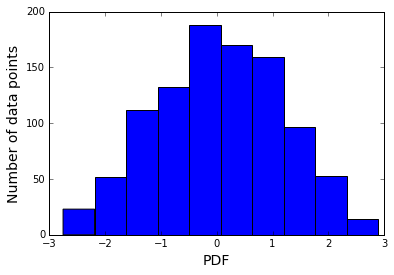

In [327]:
import scipy.stats

rv = scipy.stats.cosine.rvs(size=1000)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(rv, bins=10)
ax.set_xlabel('PDF', fontsize=14)
ax.set_ylabel('Number of data points', fontsize=14)

---
### *Exercise*

> Make two axes in a figure and compare two different distributions. (Use tab completion to see what options are available.) 

> What happens if the size of the random variable vector is very small? Large? How does this relate to the `bins` keyword argument in the histogram plotting function?

---

# D. 2D plots

## scatter

Scatter plots are good for plotting x, y, z triplets when they are in triplet form (lists of x, y, z, coordinates) which may be randomly ordered, instead of ordered arrays.

We can really capture 4 sets of information together in a `scatter` plot:

* x vs. y with markers (just like we can do with `plot`)
* x vs y with marker color representing z
* x v. y with marker color and marker size representing two more sets of data


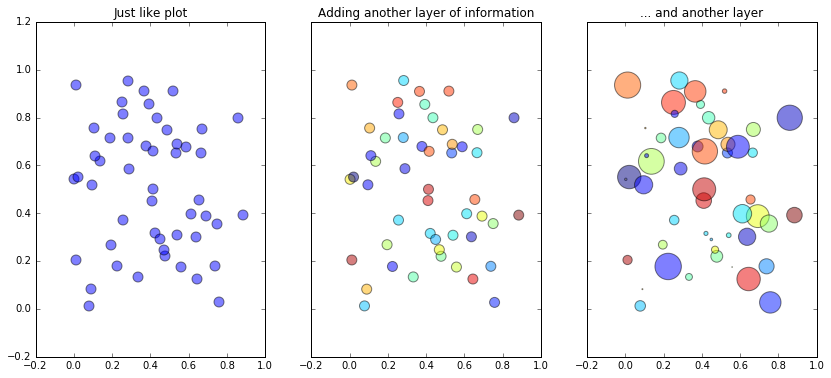

In [328]:
# from http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radiuses

fig, axes = plt.subplots(1, 3, sharey=True, figsize=(14,6))
axes[0].scatter(x, y, s=100, alpha=0.5)
axes[0].set_title('Just like plot')
axes[1].scatter(x, y, s=100, c=colors, alpha=0.5)
axes[1].set_title('Adding another layer of information')
axes[2].scatter(x, y, s=area, c=colors, alpha=0.5)
axes[2].set_title('... and another layer')


---
### *Exercise*

> Temperature and salinity are known to have an important relationship in oceanography. Investigate that relationship in the CTD data. Plot the two against each other with a scatter plot.

> Next, plot temperature vs. salinity and color the markers with the depth.

> If you have time, size the markers with another property of your choice from the file.

---

## `quiver(x, y, u, v)`

The quiver command allows us to plot arrows. Typically they are used to show the direction of flow. They can be pretty difficult to work with because of the necessary number of available parameters you can tweak, but they are very useful for showing movement from your data.

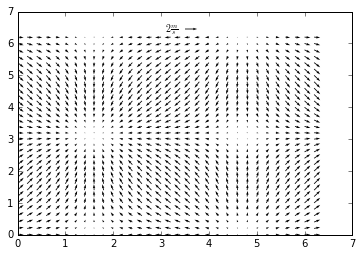

In [329]:
# http://matplotlib.org/examples/pylab_examples/quiver_demo.html
X, Y = np.meshgrid(np.arange(0, 2 * np.pi, .2), np.arange(0, 2 * np.pi, .2))
U = np.cos(X)
V = np.sin(Y)

fig = plt.figure()
ax = fig.add_subplot(111)
Q = ax.quiver(X, Y, U, V)
qk = ax.quiverkey(Q, 0.5, 0.92, 2, r'$2 \frac{m}{s}$', labelpos='W', fontproperties={'weight': 'bold'})


## `pcolor/pcolormesh(X, Y, C, cmap=colormap, vmin=data_min, vmax=data_max)`

`pcolor` and `pcolormesh` are very similar and plot arrays. `X` and `Y` are coordinate locations of the data array `C`. The `cmap` keyword argument will take in a colormap instance (some strings are allowed here too), and `vmin`, `vmax` set the minimum and maximum values represented in the plot.

A few notes:
* The `X` and `Y` locations associated with the `C` values are assumed to be at the corners of the block of information represented by an element in `C`; so `X` and `Y` should have one more element in both the x and y directions.
 - if `X` and `Y` are given with the same shape as `C`, the final row and column in `C` will be ignored.
* `pcolormesh` is an alternative to `pcolor` that is much faster due to the differences in their basic setup — basically we can just always use `pcolormesh` and not worry about the differences.
* These functions cannot have an element with `np.nan` — but `contourf` can. Masked arrays are fine.

> John Hunter wrote `matplotlib` originally and passed away suddenly in 2012. He was [memorialized](https://mail.scipy.org/pipermail/ipython-dev/2012-August/010135.html) online by his friend Fernando Perez, author of iPython and head of the Jupyter project.

> In his honor, we will use a photo of the man himself to learn about some `matplotlib` functions, take from the [front page](http://matplotlib.org/) of `matplotlib`. We have simplified the photo to be grayscale; that is, the intensity of the color is represented by a combination of the previous 3D colorspace as a number between 0 and 1. We have simplified the photo to be grayscale; that is, the intensity of the color is represented by a combination of the previous 3D colorspace as a number between 0 and 1.

![John Hunter](http://matplotlib.org/_static/John-hunter-crop-2.jpg)

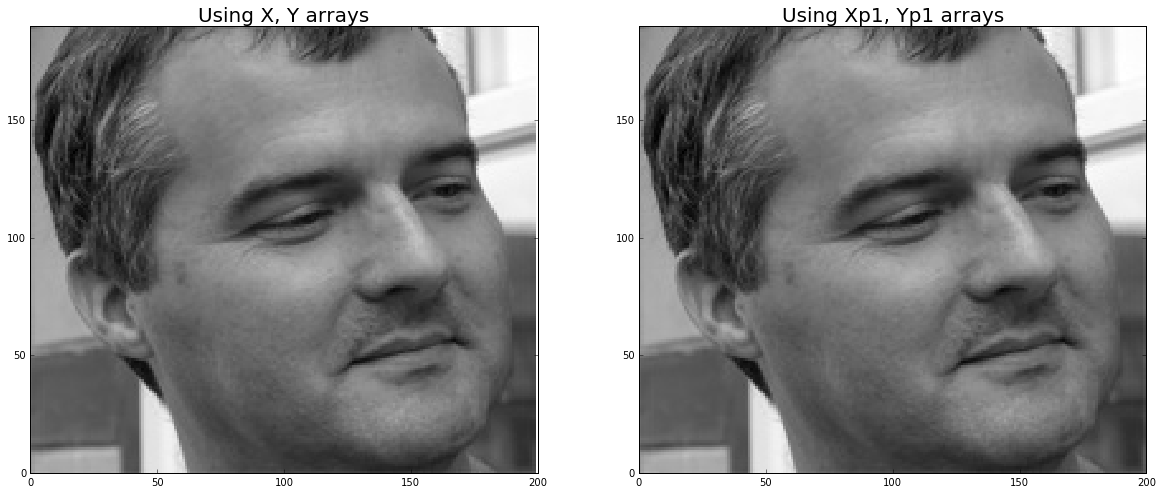

In [330]:
# Using an image of John Hunter, the original author of matplotlib
john = plt.imread('john_hunter_bw.png')[::-1,:,0]  # flipped to counter typical image reading direction and only need
                                                 # one plane of data for grayscale

# Create x and y matrices to go with image
x = np.arange(john.shape[1])
y = np.arange(john.shape[0])
X, Y = np.meshgrid(x, y)

# Create x and y matrices (larger size) to go with image
x = np.arange(john.shape[1]+1)
y = np.arange(john.shape[0]+1)
Xp1, Yp1 = np.meshgrid(x, y)

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1, 2, 1)
ax.pcolormesh(X, Y, john, cmap='gray')  # use the gray colormap to look more realistic
ax.axis([Xp1.min(), Xp1.max(), Y.min(), Y.max()])
ax.set_title('Using X, Y arrays', fontsize=20)

ax2 = fig.add_subplot(1, 2, 2)
ax2.pcolormesh(Xp1, Yp1, john, cmap='gray')  # use the gray colormap to look more realistic
ax2.axis([Xp1.min(), Xp1.max(), Y.min(), Y.max()])
ax2.set_title('Using Xp1, Yp1 arrays', fontsize=20)


#### *Why is there a blank column at the far right side of the first image?*

WRITE ABOUT CONTOUR AND CONTOURF HERE ALSO CLABEL

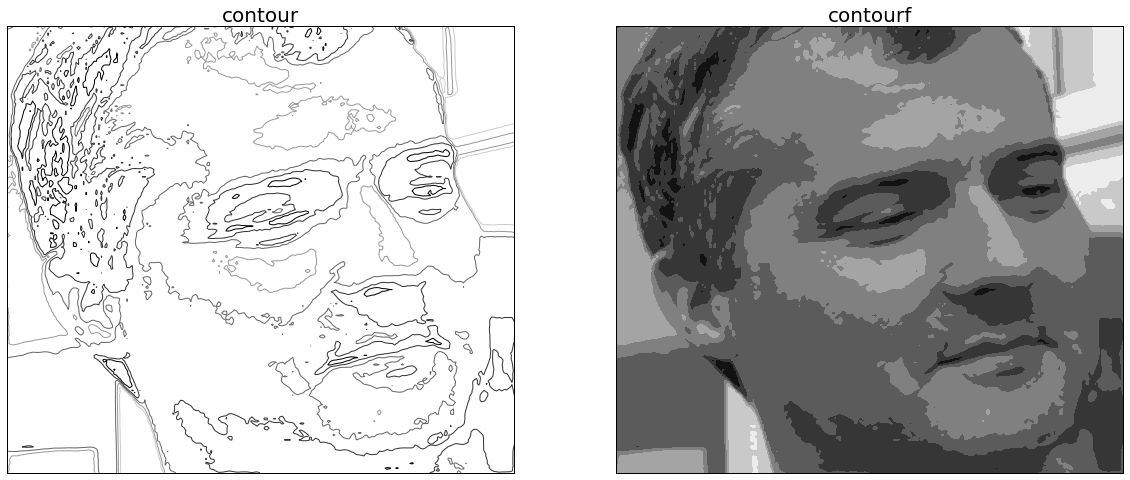

In [335]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1, 2, 1)
ax.contour(X, Y, john, cmap='gray')  # use the gray colormap to look more realistic
ax.set_xticks([])  # turn off ticks since they don't help us here
ax.set_yticks([])
ax.set_title('contour', fontsize=20)

ax2 = fig.add_subplot(1, 2, 2)
ax2.contourf(X, Y, john, cmap='gray')  # use the gray colormap to look more realistic
ax2.set_xticks([])  # turn off ticks since they don't help us here
ax2.set_yticks([])
ax2.set_title('contourf', fontsize=20)


## colorbar

esp with multiple plots, mappables, how to make sure the correct min/max are used

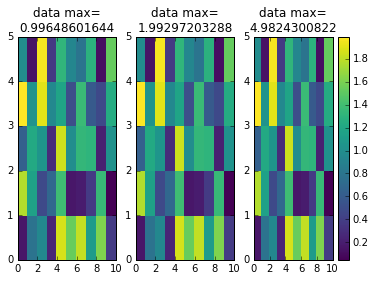

In [357]:
Z = np.random.rand(5, 10)

fig = plt.figure()
ax1 = fig.add_subplot(1, 3, 1)
ax1.pcolormesh(Z, cmap='viridis')
ax1.set_title('data max=\n' + str(Z.max()))

ax2 = fig.add_subplot(1, 3, 2)
mappable = ax2.pcolormesh(Z*2, cmap='viridis')
ax2.set_title('data max=\n' + str((Z*2).max()))

ax3 = fig.add_subplot(1, 3, 3)
ax3.pcolormesh(Z*5, cmap='viridis')
ax3.set_title('data max=\n' + str((Z*5).max()))

fig.colorbar(mappable)

---
### *Exercise*

> Try different colormaps.

> What happens as you increase the number of contours used in the `contourf` plot of John? Also, try inputting different sequences of contour values to plot (the `V` keyword argument).

---

# E. Advanced

animations
general good design practices - chartjunk, tufte, linestyles and widths, font size, colormaps
colormap: link to a few options like the matplotlib gallery of colormaps and my matplotlib doc page
overlaid axes
complex tiling
zoomed axes

# F. Other plotting packages